In [21]:
import pandas as pd

df = pd.read_csv('../data/Fish.csv')
full_data = df[['Length2', 'Height', 'Width']]
weight_data = df['Weight']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(full_data, weight_data, random_state=42)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
train_poly = poly.fit_transform(X_train) # train only
test_poly = poly.transform(X_test)

In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, y_train)
print(lr.score(train_poly, y_train))
print(lr.score(test_poly, y_test))

0.9841499137519212
0.9707962001317236


In [25]:
poly = PolynomialFeatures(degree=5,include_bias=False)
train_poly = poly.fit_transform(X_train)
test_poly = poly.transform(X_test)

In [27]:
lr = LinearRegression()
lr.fit(train_poly, y_train)
print(lr.score(train_poly, y_train))
print(lr.score(test_poly, y_test))

0.9952979420982297
0.9315094114222745


In [28]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly) # train only
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

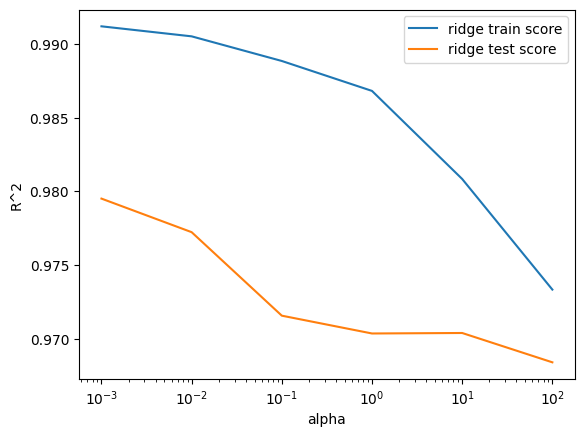

In [37]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, y_train)
    train_score_list.append(ridge.score(train_scaled, y_train))
    test_score_list.append(ridge.score(test_scaled, y_test))

plt.plot(alpha_list, train_score_list, label='ridge train score')
plt.plot(alpha_list, test_score_list, label='ridge test score')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

/home/yongsoo/miniconda3/envs/ml_study/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.982e+04, tolerance: 1.502e+03
  model = cd_fast.enet_coordinate_descent(
/home/yongsoo/miniconda3/envs/ml_study/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.901e+04, tolerance: 1.502e+03
  model = cd_fast.enet_coordinate_descent(
/home/yongsoo/miniconda3/envs/ml_study/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

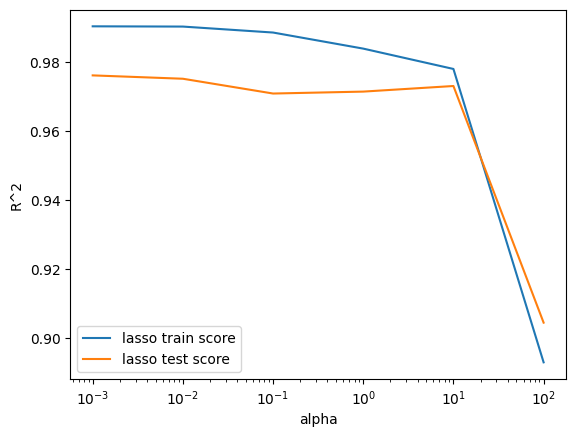

In [38]:
from sklearn.linear_model import Lasso

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, y_train)
    train_score_list.append(lasso.score(train_scaled, y_train))
    test_score_list.append(lasso.score(test_scaled, y_test))

plt.plot(alpha_list, train_score_list, label='lasso train score')
plt.plot(alpha_list, test_score_list, label='lasso test score')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()